In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [182]:
n = 200
random.seed(123)
x = np.random.uniform(0, 300, n)
#xs = (x - x.mean())/x.std()
x = x[np.argsort(x)]
y = 5 + x + x**2 + x**3
y_obs = y + np.random.normal(0, 900000, n)

In [183]:
x_train = x[x < 200]
x_test = x[x >= 200]

In [184]:
n_train = len(x_train)
n_test = len(x_test)

In [185]:
def f(x, n):
    n = len(x)
    y = 5 + x + x**2 + x**3
    y_obs = y + np.random.normal(0, 900000, n)
    return (y_obs)

In [186]:
def design(x, n):
    n = len(x)
    X = np.c_[np.ones(n), x, x**2, x**3, x**4, x**5, x**6]
    return (X)

In [187]:
def ridge_ls(x, λ, y_obs):
    X = design(x, n)
    y_obs = f(x,n)
    I = np.eye(7)
    I[0,0] = 0
    θ = np.linalg.inv(X.T.dot(X) + λ*I).dot(X.T).dot(y_obs)
    return (θ)

In [188]:
X_train = design(x_train, n_train)
X_test = design(x_test, n_test)
y_obs = f(x_train, n_train)
I = np.eye(7)
I[0,0] = 0

In [189]:
# Train Set
lambda_0 = ridge_ls(x_train, 0, y_obs)
lambda_1 = ridge_ls(x_train, 0.5, y_obs)
lambda_2 = ridge_ls(x_train, 10, y_obs)
lambda_3 = ridge_ls(x_train, 20, y_obs)
lambda_4 = ridge_ls(x_train, 30, y_obs)
lambda_5 = ridge_ls(x_train, 80, y_obs)
lambda_6 = ridge_ls(x_train, 100, y_obs)
lambda_7 = ridge_ls(x_train, 200, y_obs)

In [190]:
# Sigma for the train set
sig_0 = (1/n)*((y_obs - X_train.dot(lambda_0)).T.dot(y_obs - X_train.dot(lambda_0)))
sig_1 = (1/n)*((y_obs - X_train.dot(lambda_1)).T.dot(y_obs - X_train.dot(lambda_1)))
sig_2 = (1/n)*((y_obs - X_train.dot(lambda_2)).T.dot(y_obs - X_train.dot(lambda_2)))
sig_3 = (1/n)*((y_obs - X_train.dot(lambda_3)).T.dot(y_obs - X_train.dot(lambda_3)))
sig_4 = (1/n)*((y_obs - X_train.dot(lambda_4)).T.dot(y_obs - X_train.dot(lambda_4)))
sig_5 = (1/n)*((y_obs - X_train.dot(lambda_5)).T.dot(y_obs - X_train.dot(lambda_5)))
sig_6 = (1/n)*((y_obs - X_train.dot(lambda_6)).T.dot(y_obs - X_train.dot(lambda_6)))
sig_7 = (1/n)*((y_obs - X_train.dot(lambda_7)).T.dot(y_obs - X_train.dot(lambda_7)))

In [191]:
# Sigma for the test set
sig_0 = (1/n)*((y_test - X_test.dot(lamda_0)).T.dot(y_test - X_test.dot(lamda_0)))
sig_1 = (1/n)*((y_test - X_test.dot(lamda_1)).T.dot(y_test - X_test.dot(lamda_1)))
sig_2 = (1/n)*((y_test - X_test.dot(lamda_2)).T.dot(y_test - X_test.dot(lamda_2)))
sig_3 = (1/n)*((y_test - X_test.dot(lamda_3)).T.dot(y_test - X_test.dot(lamda_3)))
sig_4 = (1/n)*((y_test - X_test.dot(lamda_4)).T.dot(y_test - X_test.dot(lamda_4)))
sig_5 = (1/n)*((y_test - X_test.dot(lamda_5)).T.dot(y_test - X_test.dot(lamda_5)))
sig_6 = (1/n)*((y_test - X_test.dot(lamda_6)).T.dot(y_test - X_test.dot(lamda_6)))
sig_7 = (1/n)*((y_test - X_test.dot(lamda_7)).T.dot(y_test - X_test.dot(lamda_7)))

In [192]:
# The Test set
X_test = design(x_test, n_test)
y_test = f(x_test, n_test)

lamda_0 = ridge_ls(x_test, 0, y_test)
lamda_1 = ridge_ls(x_test, 0.5, y_test)
lamda_2 = ridge_ls(x_test, 10, y_test)
lamda_3 = ridge_ls(x_test, 20, y_test)
lamda_4 = ridge_ls(x_test, 30, y_test)
lamda_5 = ridge_ls(x_test, 80, y_test)
lamda_6 = ridge_ls(x_test, 100, y_test)
lamda_7 = ridge_ls(x_test, 200, y_test)

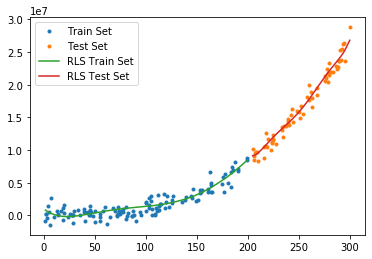

In [193]:
plt.plot(x_train, y_obs, '.', label='Train Set')
plt.plot(x_test, y_test, '.', label='Test Set')
plt.plot(x_train, lambda_0[0] + lambda_0[1]*x_train + lambda_0[2]*x_train**2  + lambda_0[3]*x_train**3  + lambda_0[4]*x_train**4  + lambda_0[5]*x_train**5  + lambda_0[6]*x_train**6, label='RLS Train Set')
plt.plot(x_test, lamda_0[0] + lamda_0[1]*x_test + lamda_0[2]*x_test**2  + lamda_0[3]*x_test**3  + lamda_0[4]*x_test**4  + lamda_0[5]*x_test**5  + lamda_0[6]*x_test**6, label='RLS Test Set')
plt.legend()
plt.show()

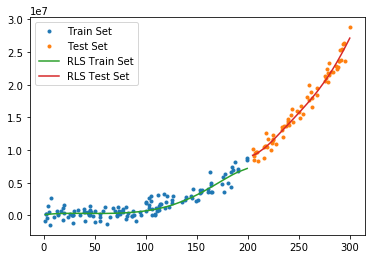

In [194]:
plt.plot(x_train, y_obs, '.', label='Train Set')
plt.plot(x_test, y_test, '.', label='Test Set')
plt.plot(x_train, lambda_1[0] + lambda_1[1]*x_train + lambda_1[2]*x_train**2  + lambda_1[3]*x_train**3  + lambda_1[4]*x_train**4  + lambda_1[5]*x_train**5  + lambda_1[6]*x_train**6, label='RLS Train Set')
plt.plot(x_test, lamda_1[0] + lamda_1[1]*x_test + lamda_1[2]*x_test**2  + lamda_1[3]*x_test**3  + lamda_1[4]*x_test**4  + lamda_1[5]*x_test**5  + lamda_1[6]*x_test**6, label='RLS Test Set')
plt.legend()
plt.show()

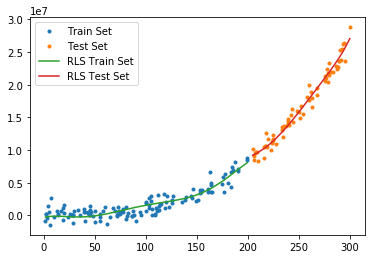

In [195]:
plt.plot(x_train, y_obs, '.', label='Train Set')
plt.plot(x_test, y_test, '.', label='Test Set')
plt.plot(x_train, lambda_2[0] + lambda_2[1]*x_train + lambda_2[2]*x_train**2  + lambda_2[3]*x_train**3  + lambda_2[4]*x_train**4  + lambda_2[5]*x_train**5  + lambda_2[6]*x_train**6, label='RLS Train Set')
plt.plot(x_test, lamda_2[0] + lamda_2[1]*x_test + lamda_2[2]*x_test**2  + lamda_2[3]*x_test**3  + lamda_2[4]*x_test**4  + lamda_2[5]*x_test**5  + lamda_2[6]*x_test**6, label='RLS Test Set')
plt.legend()
plt.show()

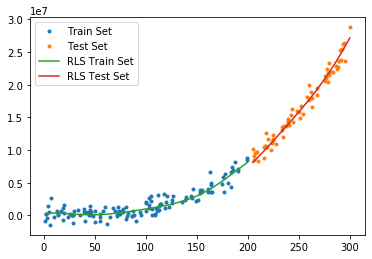

In [196]:
plt.plot(x_train, y_obs, '.', label='Train Set')
plt.plot(x_test, y_test, '.', label='Test Set')
plt.plot(x_train, lambda_3[0] + lambda_3[1]*x_train + lambda_3[2]*x_train**2  + lambda_3[3]*x_train**3  + lambda_3[4]*x_train**4  + lambda_3[5]*x_train**5  + lambda_3[6]*x_train**6, label='RLS Train Set')
plt.plot(x_test, lamda_3[0] + lamda_3[1]*x_test + lamda_3[2]*x_test**2  + lamda_3[3]*x_test**3  + lamda_3[4]*x_test**4  + lamda_3[5]*x_test**5  + lamda_3[6]*x_test**6, label='RLS Test Set')
plt.legend()
plt.show()

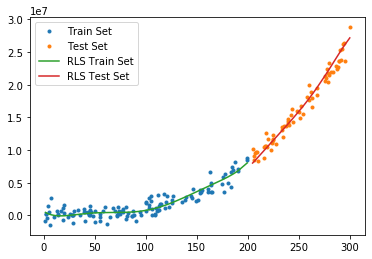

In [197]:
plt.plot(x_train, y_obs, '.', label='Train Set')
plt.plot(x_test, y_test, '.', label='Test Set')
plt.plot(x_train, lambda_4[0] + lambda_4[1]*x_train + lambda_4[2]*x_train**2  + lambda_4[3]*x_train**3  + lambda_4[4]*x_train**4  + lambda_4[5]*x_train**5  + lambda_4[6]*x_train**6, label='RLS Train Set')
plt.plot(x_test, lamda_4[0] + lamda_4[1]*x_test + lamda_4[2]*x_test**2  + lamda_4[3]*x_test**3  + lamda_4[4]*x_test**4  + lamda_4[5]*x_test**5  + lamda_4[6]*x_test**6, label='RLS Test Set')
plt.legend()
plt.show()

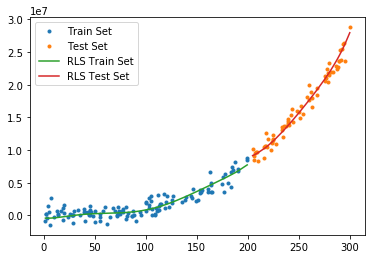

In [198]:
plt.plot(x_train, y_obs, '.', label='Train Set')
plt.plot(x_test, y_test, '.', label='Test Set')
plt.plot(x_train, lambda_5[0] + lambda_5[1]*x_train + lambda_5[2]*x_train**2  + lambda_5[3]*x_train**3  + lambda_5[4]*x_train**4  + lambda_5[5]*x_train**5  + lambda_5[6]*x_train**6, label='RLS Train Set')
plt.plot(x_test, lamda_5[0] + lamda_5[1]*x_test + lamda_5[2]*x_test**2  + lamda_5[3]*x_test**3  + lamda_5[4]*x_test**4  + lamda_5[5]*x_test**5  + lamda_5[6]*x_test**6, label='RLS Test Set')
plt.legend()
plt.show()

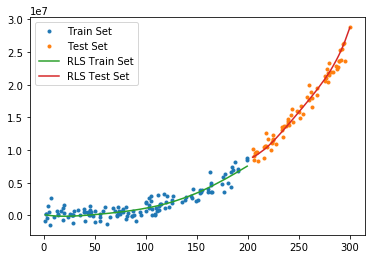

In [199]:
plt.plot(x_train, y_obs, '.', label='Train Set')
plt.plot(x_test, y_test, '.', label='Test Set')
plt.plot(x_train, lambda_6[0] + lambda_6[1]*x_train + lambda_6[2]*x_train**2  + lambda_6[3]*x_train**3  + lambda_6[4]*x_train**4  + lambda_6[5]*x_train**5  + lambda_6[6]*x_train**6, label='RLS Train Set')
plt.plot(x_test, lamda_6[0] + lamda_6[1]*x_test + lamda_6[2]*x_test**2  + lamda_6[3]*x_test**3  + lamda_6[4]*x_test**4  + lamda_6[5]*x_test**5  + lamda_6[6]*x_test**6, label='RLS Test Set')
plt.legend()
plt.show()

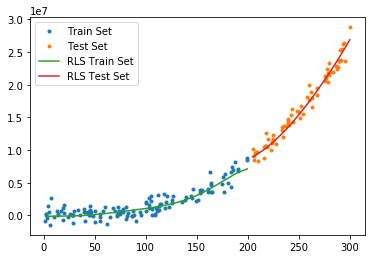

In [200]:
plt.plot(x_train, y_obs, '.', label='Train Set')
plt.plot(x_test, y_test, '.', label='Test Set')
plt.plot(x_train, lambda_7[0] + lambda_7[1]*x_train + lambda_7[2]*x_train**2  + lambda_7[3]*x_train**3  + lambda_7[4]*x_train**4  + lambda_7[5]*x_train**5  + lambda_7[6]*x_train**6, label='RLS Train Set')
plt.plot(x_test, lamda_7[0] + lamda_7[1]*x_test + lamda_7[2]*x_test**2  + lamda_7[3]*x_test**3  + lamda_7[4]*x_test**4  + lamda_7[5]*x_test**5  + lamda_7[6]*x_test**6, label='RLS Test Set')
plt.legend()
plt.show()